In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

dane = pd.read_csv('../../clustering.csv', names=['x', 'y'])
dane.head()

,x,y
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186


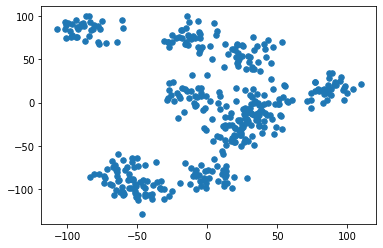

In [44]:
plt.scatter(dane['x'], dane['y'], s=30, cmap='viridis')

# Metoda k-średnich

In [45]:
def plot_kmeans_clusters(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    plt.scatter(X['x'], X['y'], c=y_kmeans, s=30, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
    plt.title('K-means clusters')
    plt.show()

Wybór liczby klastrów dokonamy metodą łokcia (im mniej tym lepiej, ale bierzemy punkt z przegięcia).

In [46]:
def count_wcss_scores(X, k_max):
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1
        scores.append(wcss)
    return scores

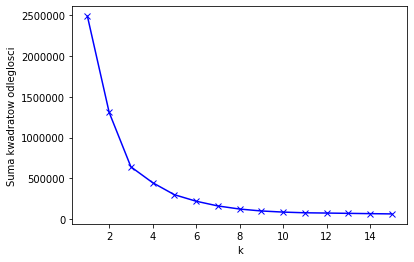

In [47]:
wcss_vec = count_wcss_scores(dane, 15)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Suma kwadratow odleglosci')
plt.show()

Widzimy, że *wypłaszczenie* zachodzi w okolicach k z zakresu 6-10. Krakowskim targiem bierzemy k=8 (oczywiście jest to bardzo subiektywne, to jest główny problem tej metody).

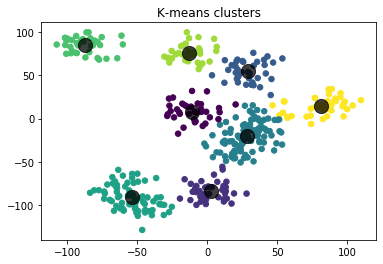

In [48]:
plot_kmeans_clusters(dane, n_clusters=8)

Moim zdaniem podział jest dość satysfakconujący. Sprawdźmy teraz inną metodę.
# Klasteryzacja aglomeracyjna
Do znalezienia *optymalnej* liczby klastrów użyjemy metody silhouette (im więcej tym lepiej).

In [49]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

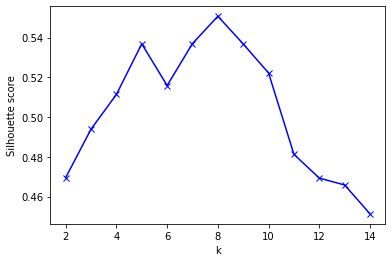

In [50]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

cluster_num_seq = range(2, 15)
silhouette_vec = count_clustering_scores(dane, cluster_num_seq, AgglomerativeClustering, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Wychodzi na to, że znowu najlepszą liczbą klastrów jest 8.

In [51]:
def plot_agglomerative_clusters(X, n_clusters):
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    agg.fit(X)
    y_agg = agg.fit_predict(X)
    plt.scatter(X['x'], X['y'], c=y_agg, s=30, cmap='viridis')

    plt.title('Agglomerative clusters')
    plt.show()

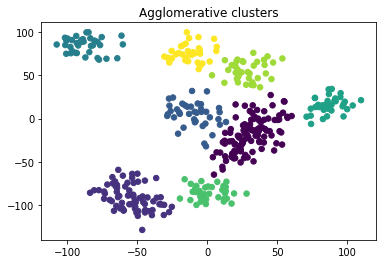

In [52]:
plot_agglomerative_clusters(dane, n_clusters=8)

W tym wypadku podział zbioru jest dość jasny, więc obie metryki (mimo innych algorytmów klasteryzacji) dały nam tę samą optymalną liczbę klastrów (oczywiście przy metodzie łokcia można by się kłócić, czy k=8 jest optymalne). Uzyskany podział również jest bardzo zbliżony.